# Чаевые в ресторане

Это задание основано на туториале Seaborn. Используйте здесь эту библиотеку.  
Документация - https://seaborn.pydata.org/index.html  
Памятка по выбору графика в seaborn - https://martinnormark.com/a-simple-cheat-sheet-for-seaborn-data-visualization-2/


### Шаг 1. Импортируем библиотеки

In [20]:
import math

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks")

### Шаг 2. Прочитаем датасет в переменную `tips`

In [21]:
# path = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
path = '../learning/datasets/tips.csv'

In [22]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

### Шаг 3. Создай столбец `time_order`
### Заполни его случайной датой в промежутке от 2023-01-01 до 2023-01-31

In [23]:
import random
from datetime import datetime as DT
from datetime import timedelta

start_dt = DT.strptime('01.01.2023', '%d.%m.%Y')
end_dt = DT.strptime('31.01.2023', '%d.%m.%Y')

def get_random_date(start, end):
    return start + timedelta(random.randint(0, (end - start).days))



x = [get_random_date(start_dt, end_dt) for _ in range(244)]

tips['time_order'] = x

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,time_order
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-01-14
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-01-31
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-01-07
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-01-22
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-01-14


### Шаг 4. Построй график показывающий динамику чаевых во времени

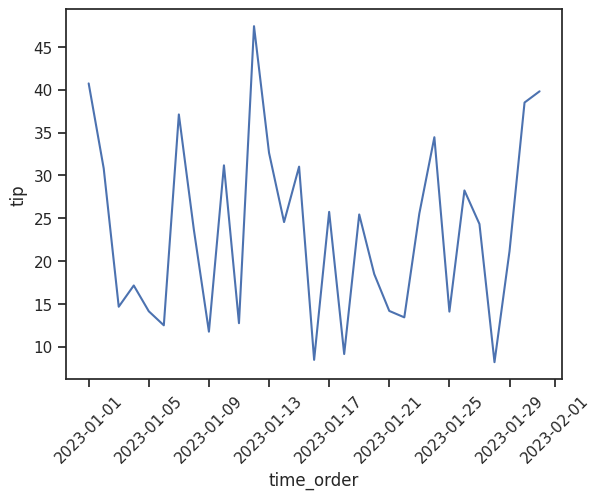

In [25]:
day = tips.groupby(pd.Grouper(key='time_order',freq='D')).agg({'tip':'sum'}).reset_index()

x = day.time_order
y = day.tip
sns.lineplot(x=x, y=y, data=day)
plt.xticks(rotation=45);

Сделай аналогичный график используя многофункциональный метод [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

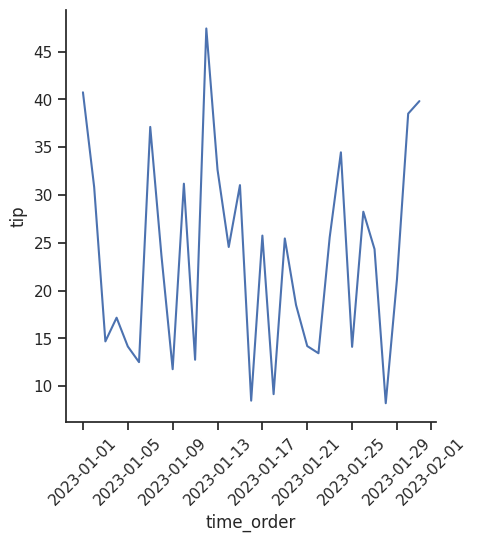

In [26]:
sns.relplot(data=day, x="time_order", y="tip",kind='line')
plt.xticks(rotation=45);

### Шаг 5. Нарисуйте гистограмму `total_bill`

In [27]:
bill = tips.groupby(pd.Grouper(key='time_order',freq='D')).agg({'total_bill':'sum'}).reset_index()
bill.head()

,time_order,total_bill
0,2023-01-01,315.35
1,2023-01-02,155.48
2,2023-01-03,81.39
3,2023-01-04,92.30
4,2023-01-05,129.43


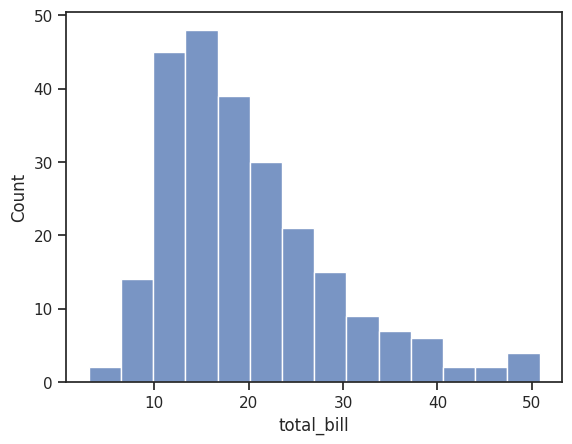

In [28]:
sns.histplot(tips['total_bill']);
# plt.xticks(rotation=45);

Сделай аналогичный график используя многофункциональный метод [displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)  
Поиграйся с другими формами отображения меняя параметр параметр `kind`  

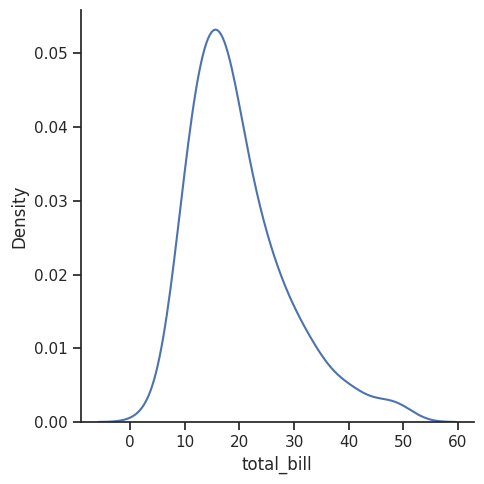

In [29]:
sns.displot(tips['total_bill'],kind = 'kde');

### Шаг 6. Нарисуйте scatterplot, показывающий связь между `total_bill` and `tip`

In [30]:
rel = tips.groupby(pd.Grouper(key='time_order',freq='D')).agg({'total_bill':'sum','tip':'sum'}).reset_index()
rel.head()

,time_order,total_bill,tip
0,2023-01-01,315.35,40.74
1,2023-01-02,155.48,30.83
2,2023-01-03,81.39,14.68
3,2023-01-04,92.30,17.16
4,2023-01-05,129.43,14.15


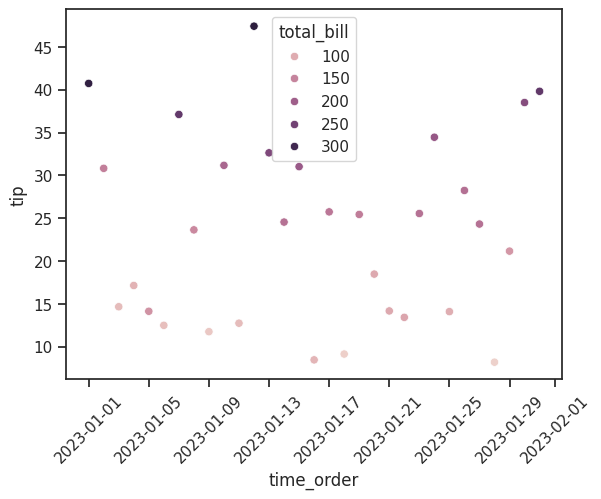

In [31]:
sns.scatterplot(data=rel, x="time_order", y="tip", hue='total_bill')
plt.xticks(rotation=45);

Сделай аналогичный график используя многофункциональный метод [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

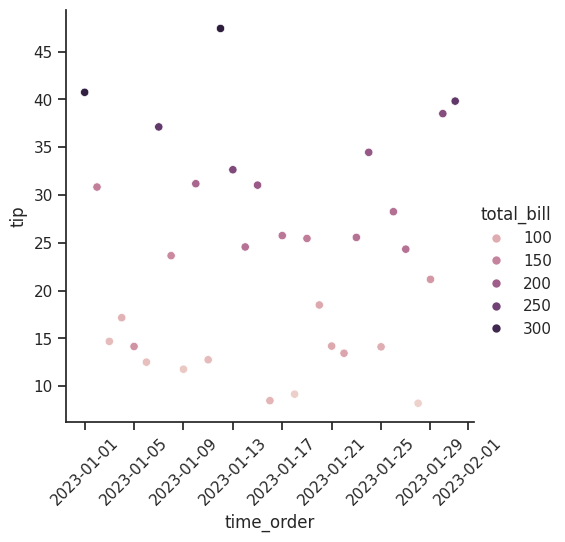

In [32]:
sns.relplot(data=rel, x="time_order", y="tip", hue='total_bill',kind='scatter')
plt.xticks(rotation=45);

### Шаг 7. Нарисуйте 1 график, связывающий `total_bill`, `tip`, и `size`
#### Подсказка: это одна функция

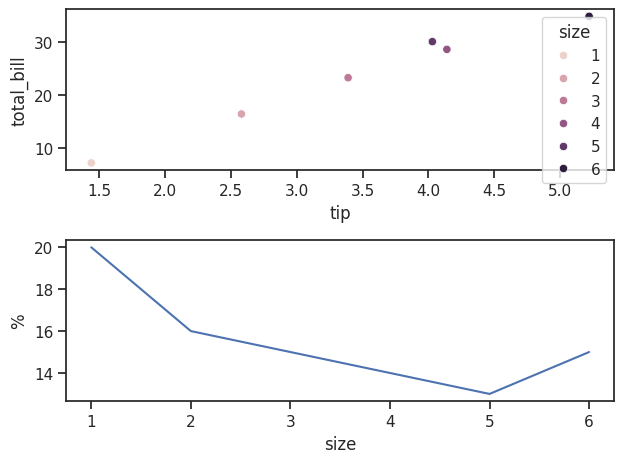

In [33]:
data = tips.groupby('size').agg({'total_bill':'mean','tip':'mean'}).round(2).copy()

data['%']=(data.tip / data.total_bill).round(2)*100

fig, ax = plt.subplots(2)
sns.scatterplot(data=data, x='tip', y="total_bill",hue = data.index, ax=ax[0])
sns.lineplot(data=data, x=data.index, y="%", ax=ax[1])
plt.tight_layout()

### Шаг 8. Покажите связь между днем недели и размером счета

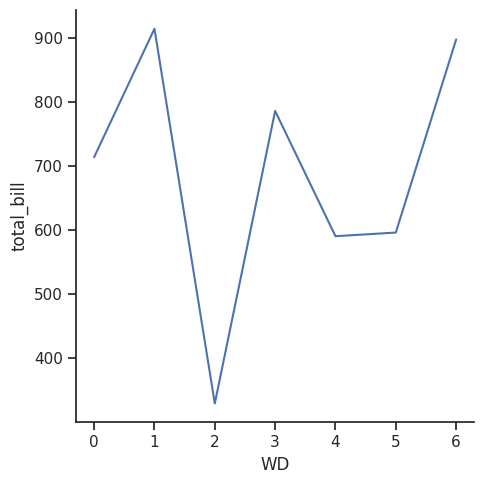

In [34]:
tips['WD']=tips['time_order'].dt.weekday
data = tips.groupby('WD').agg({'total_bill':'sum'})
sns.relplot(data=data, x= data.index, y = 'total_bill',kind='line');

### Шаг 9. Нарисуйте `scatter plot` с днем недели по оси **Y**, чаевыми по оси **X**, и цветом по полу

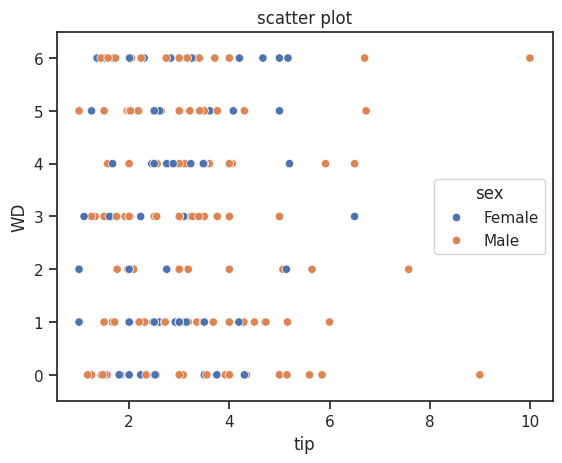

In [35]:
sns.scatterplot(data=tips.loc[:,['WD','sex','tip']],x='tip',y='WD',hue='sex');
plt.ylim(bottom=-.5,top=6.5)
plt.title('scatter plot');

### Шаг 10. Нарисуйте `box plot` c суммой всех счетов за каждый день, разбивая по `time` (Dinner/Lunch)

Как понимать boxplot? https://tidydata.ru/boxplot

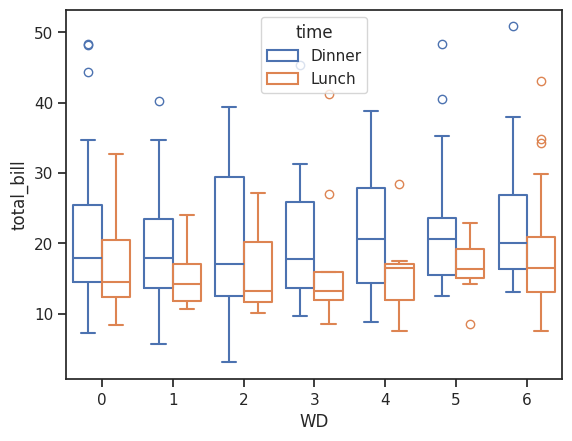

In [36]:
z = tips.loc[:,['WD','time','total_bill','time_order']].groupby(['time',pd.Grouper(key='time_order',freq='D')]).\
agg({'total_bill':'mean'}).reset_index()

sns.boxplot(data=tips,x='WD',y='total_bill',hue='time',fill=False);

Построй аналогичный график используя многофункциональный метод [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)    
Поиграйся с другими формами отображения меняя параметр параметр `kind`

### Шаг 11. Нарисуйте 2 гистограммы чаевых на обед и ланч. Расположите их рядом по горизонтали.

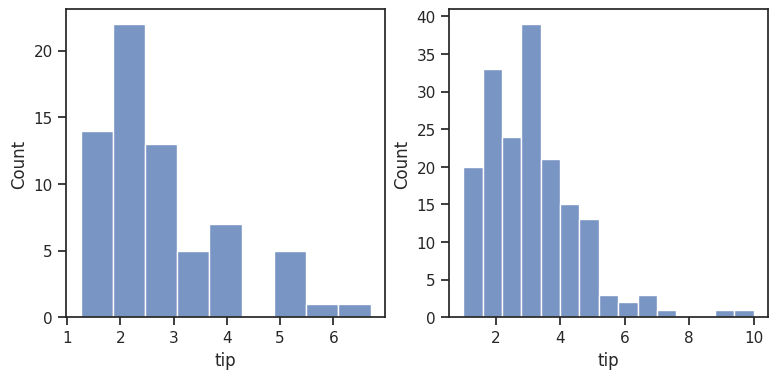

In [37]:
# tips.loc[(tips['time'] == 'Lunch')]['time']

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(x=tips[(tips['time'] == 'Lunch')]['tip']);

plt.subplot(1,3,2)
sns.histplot(x=tips[(tips['time'] == 'Dinner')]['tip']);

# plt.subplot(1,3,3)
# sns.histplot(x=tips.time);

### Шаг 12. Нарисуйте 2 scatterplots (для мужчин и женщин), показав связь размера счета и чаевых, дополнительно разбив по курящим/некурящим. Расположите их по горизонтали.

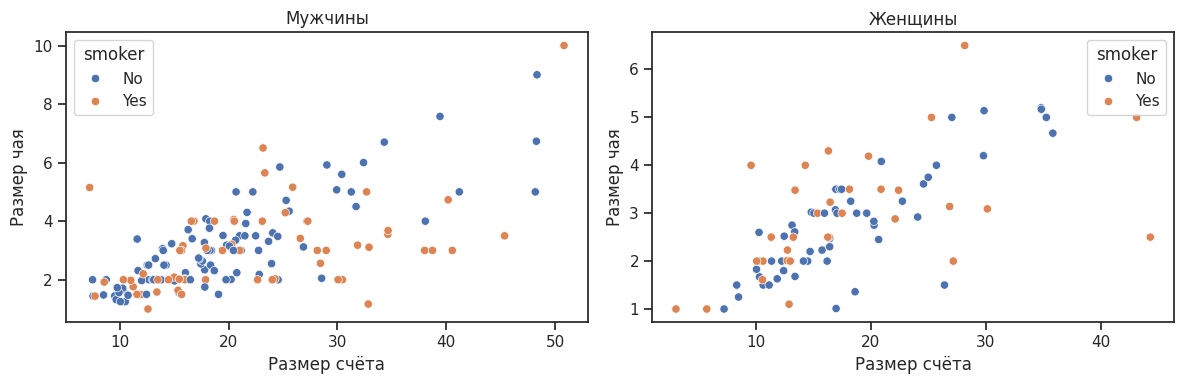

In [38]:
xx = tips[['sex','smoker','total_bill','tip']]
male = tips.loc[(tips['sex']=='Male'),:]
female = tips.loc[(tips['sex']=='Female'),:]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=male['total_bill'],y=male['tip'],hue=male['smoker'])
plt.title('Мужчины')
plt.xlabel('Размер счёта')
plt.ylabel('Размер чая')


plt.subplot(1,2,2)
sns.scatterplot(x=female['total_bill'],y=female['tip'],hue=female['smoker'])
plt.title('Женщины')
plt.xlabel('Размер счёта')
plt.ylabel('Размер чая')


plt.tight_layout();

### Шаг 13. Построй тепловую карту зависимостей численных переменных
Матрица корреляций в pandas - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

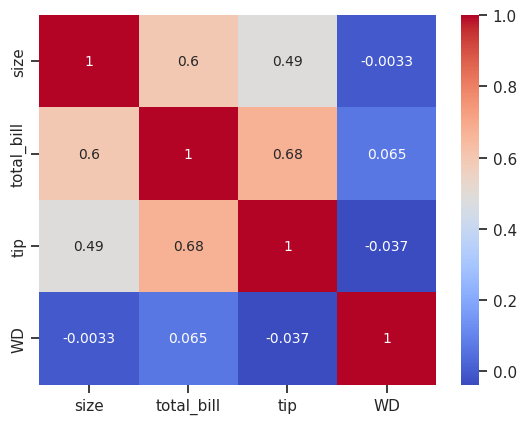

In [39]:
dat = tips.loc[:,['size','total_bill','tip','WD']]
x = dat.corr()
sns.heatmap(x,cmap="coolwarm",annot= True, annot_kws={"size":10});

### БОНУС: Задайте свой вопрос и ответьте на него с помощью графика.

In [40]:
tips

,total_bill,tip,sex,smoker,day,time,size,time_order,WD
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-01-14,5
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-01-31,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-01-07,5
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-01-22,6
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-01-14,5
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2023-01-13,4
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2023-01-12,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2023-01-12,3
242,17.82,1.75,Male,No,Sat,Dinner,2,2023-01-12,3


In [62]:
y = tips['WD'].copy().to_frame()

In [63]:
def day_maker(x):
    a = list(['Понедельник','Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье'])
    return a[x]

In [64]:
day_maker(0)

'Понедельник'

In [68]:
y['WD']= [day_maker(i) for i in y['WD']]

In [69]:
y

,WD
0,Суббота
1,Вторник
2,Суббота
3,Воскресенье
4,Суббота
...,...
239,Пятница
240,Четверг
241,Четверг
242,Четверг
